# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
    
#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`
    
                                                                                            
                                                                                           

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Data preprocessing

In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

# Transform the sentence into a term-sentence matrix 
# Produce the word frequency vector for each document
train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_counts = train_count_vect.fit_transform(train_df.text)
test_counts  = test_count_vect.fit_transform(test_df.text)

# Convert the sparse matrix(train_counts) into a dataframe
df_counts_train = pd.DataFrame(train_counts.toarray())
train_counts_sum = df_counts_train.sum()
# Sort the data frame column based on the word frequency
df_counts_train = df_counts_train[train_counts_sum.sort_values(ascending=False).index[:]]
# Store the feature names(word) into a list
idx_list_train = list(df_counts_train.columns)


# Convert the sparse matrix(test_counts) into a dataframe
df_counts_test = pd.DataFrame(test_counts.toarray())
test_counts_sum = df_counts_test.sum()
# Sort the data frame column based on the word frequency
df_counts_test = df_counts_test[test_counts_sum.sort_values(ascending=False).index[:]]
# Store the feature names(word) into a list
idx_list_test = list(df_counts_test.columns)

Plot result

In [7]:
import plotly.express as px

train_term_freq = train_counts_sum.tolist()
test_term_freq = test_counts_sum.tolist()

px_x = train_count_vect.get_feature_names_out()[idx_list_train[0:30]]
px_y = [train_term_freq[i] for i in idx_list_train[0:30]]

fig = px.bar(x=px_x, y=px_y, category_orders = px_x, 
             labels={'x':'Feature names', 'y':'Frequencies'}, title="Top 30 most frequently appearing features (Train dataset)")
fig.show()

px_x = test_count_vect.get_feature_names_out()[idx_list_test[0:30]]
px_y = [test_term_freq[i] for i in idx_list_test[0:30]]

fig = px.bar(x=px_x, y=px_y, category_orders = px_x, 
             labels={'x':'Feature names', 'y':'Frequencies'}, title="Top 30 most frequently appearing features (Test dataset)")
fig.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [9]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [10]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

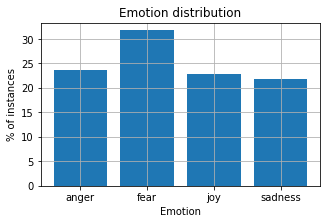

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [14]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [15]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [16]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [17]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [19]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [20]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [21]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [22]:
train_data_BOW_features_500.toarray()

array([[0, 4, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [24]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

Show the TF-IDF matrix

In [25]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF features
TFIDF_1000 = TfidfVectorizer(smooth_idf=True, max_features=1000)
TFIDF_1000.fit(train_df['text'])
x = TFIDF_1000.transform(train_df['text'])
tfidf = pd.DataFrame(x.toarray(), columns=TFIDF_1000.get_feature_names_out())
tfidf

,10,100,12,15,17,20,2016,30,70,about,...,years,yes,yesterday,yet,yo,you,young,your,yourself,youtube
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.273057,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3609,0.336327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3610,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3611,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Show the features name for features [100:110]

In [26]:
tfidf_feature_names = TFIDF_1000.get_feature_names()
tfidf_feature_names[100:110]

C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [28]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'anger', 'fear', 'sadness', 'joy', 'anger', 'fear',
       'fear', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [29]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [30]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [32]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

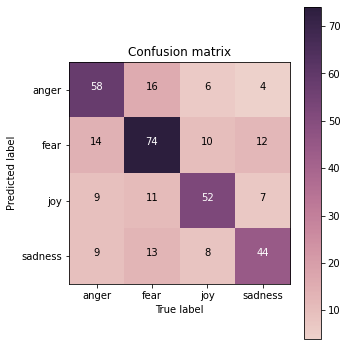

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [34]:
# Answer Below

Interpretation:

The diagonal elements of the confusion matrix mean the number of correct prediction for the certain emotion. As we can see, the fear emotion shows a good classification result (74 corret prediction). 

The non-diagonal elements of the matrix record the misclassification of our model.Futhermore, we can see which emotion have been most misclassified. From the (row=anger, col=fear), the number 16 means that the fear emotion have been misclassified into anger 16 times. Hence, we can know the semantic meaning of fear and anger may look alike from the point of view of our model. 

Anger and joy, which are two very different emotions, have only be misclassified 6 times. Therefore, we can say that the model can still capture some of the semantic meaning.However, although the results above may have some misclassification, the overall accuracy is relatively high. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes classifier built by BOW

In [35]:
# Answer here
# Use the TF-IDF features to build the multinomial Naive Bayes classifier.
from sklearn.naive_bayes import MultinomialNB
print("Multinomial Naive Bayes classifier")

# Use the word frequency features to build the multinomial Naive Bayes classifier.
MNB_bow = MultinomialNB()
MNB_bow.fit(X_train, y_train)

bow_pred_train = MNB_bow.predict(X_train)
bow_pred_test  = MNB_bow.predict(X_test)

bow_acc_train = accuracy_score(y_true=y_train, y_pred=bow_pred_train)
bow_acc_test  = accuracy_score(y_true=y_test,  y_pred=bow_pred_test)

print('(BOW 500)training accuracy: {}'.format(round(bow_acc_train, 2)))
print('(BOW 500)testing  accuracy: {}'.format(round(bow_acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=bow_pred_test))

Multinomial Naive Bayes classifier
(BOW 500)training accuracy: 0.79
(BOW 500)testing  accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


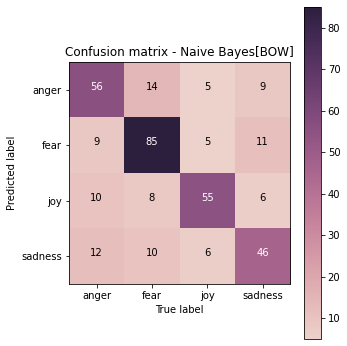

In [36]:
cm_bow = confusion_matrix(y_true=y_test, y_pred=bow_pred_test) 
print(cm_bow)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_bow, classes=my_tags, title='Confusion matrix - Naive Bayes[BOW]')

Naive Bayes classifier built by TF-IDF

In [37]:
# Use the TF-IDF features to build the Gaussian Naive Bayes classifier.
X_train_tfidf = TFIDF_1000.transform(train_df['text'])
X_test_tfidf = TFIDF_1000.transform(test_df['text'])

MNB_tfidf = MultinomialNB()
MNB_tfidf.fit(X_train_tfidf, y_train)

tfidf_pred_train = MNB_tfidf.predict(X_train_tfidf)
tfidf_pred_test  = MNB_tfidf.predict(X_test_tfidf)

tfidf_acc_train = accuracy_score(y_true=y_train, y_pred=tfidf_pred_train)
tfidf_acc_test  = accuracy_score(y_true=y_test,  y_pred=tfidf_pred_test)

print('(TFIDF 1000)training accuracy: {}'.format(round(tfidf_acc_train, 2)))
print('(TFIDF 1000)testing  accuracy: {}'.format(round(tfidf_acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=tfidf_pred_test))

(TFIDF 1000)training accuracy: 0.87
(TFIDF 1000)testing  accuracy: 0.77
              precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347



[[ 60  14   6   4]
 [  8 100   1   1]
 [  5  12  59   3]
 [  3  22   2  47]]


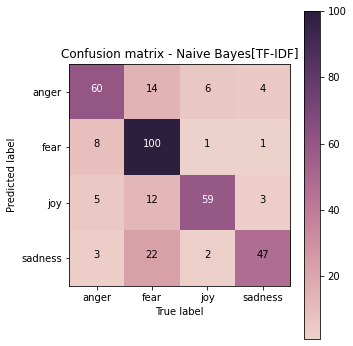

In [38]:
cm_tfidf = confusion_matrix(y_true=y_test, y_pred=tfidf_pred_test) 
print(cm_tfidf)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_tfidf, classes=my_tags, title='Confusion matrix - Naive Bayes[TF-IDF]')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [34]:
# Answer below

Interpretation:


| F1-score                | anger | fear |  joy | sadness | avg F1-score |
|-------------------------|:-----:|:----:|:----:|:-------:|:------------:|
| Decision Tree - BOW500  |  0.67 | 0.66 | 0.67 |   0.62  |     0.66     |
| Naive Bayes - BOW500    |  0.65 | 0.75 | 0.73 |   0.63  |     0.69     |
| Naive Bayes - TFIDF1000 |  0.75 | 0.78 | 0.80 |   0.73  |     0.76     |

From the table above, we can see the performance of Naive Bayes classifier are better than the Decision Tree model no matter using the BOW or TFIDF features. 

[Naive Bayes]<br>
The Naive Bayes classifier is a probabilistic model based on Bayes’ theorem which is used to calculate the probability P(A|B) of an event A occuring, when we are given some prior knowledge B. The major advantage of Naive Bayes is the independence assumption. This means that we assume that each feature’s value does not influence other features’ values. This assumption can help us to reduce the number of computations and the required data set, which can avoid the overfitting problem.

[Decision Tree]<br>
A decision tree is contructed by a collection of value checks on each feature. Then, we can output a decision based on the given attributes and the inference process. For the decision tree, we can utilize different ways to find out the best split of the features (e.g. Entropy, Gini index). The most siginificant advantage of decision tree is the explainability.

[Comparison]<br>
Decision tree is be benefit for its simple reasoning and interpretation. But in text classification problem, the complicated data or sequence data may let decision tree have the difficulty making the right decision. On the other hand, the Naive Bayes classifier (MultinomialNB) is suitable for classification with discrete features (e.g., word counts for text classification).


---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [138]:
# import keras
from tensorflow import keras 
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [139]:
## deal with label (string -> one-hot)
# from tensorflow.keras import utils as np_utils
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3445    sadness
664       anger
541       anger
369       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [140]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [142]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

### 6.4 Train

In [143]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 5ms/step - loss: 1.3465 - accuracy: 0.3451 - val_loss: 1.2308 - val_accuracy: 0.4841
Epoch 2/25
113/113 [==============================] - 0s 4ms/step - loss: 1.0356 - accuracy: 0.6338 - val_loss: 0.9060 - val_accuracy: 0.6599
Epoch 3/25
113/113 [==============================] - 0s 4ms/step - loss: 0.5857 - accuracy: 0.8072 - val_loss: 0.7724 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8677 - val_loss: 0.7708 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8919 - val_loss: 0.7918 - val_accuracy: 0.7089
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.9206 - val_loss: 0.8568 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 0.9343 - val_loss: 0.9192 - val_accuracy: 0.6715
Epoch 

### 6.5 Predict on testing data

In [144]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[3.9442406e-05, 1.7681354e-05, 9.9990356e-01, 3.9351900e-05],
       [3.4625642e-05, 9.9990928e-01, 4.5377717e-05, 1.0783437e-05],
       [2.3166392e-06, 4.4358618e-05, 9.9995160e-01, 1.6927684e-06],
       [1.3312002e-05, 9.3099409e-01, 3.0343377e-04, 6.8689078e-02],
       [9.9833626e-01, 1.9474670e-04, 4.7408815e-07, 1.4685987e-03]],
      dtype=float32)

In [145]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'joy', 'fear', 'anger'], dtype=object)

In [146]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [147]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.400221,1.306527,0.484150,1.230818
1,1,0.672294,0.941135,0.659942,0.906010
2,2,0.801827,0.570260,0.703170,0.772444
3,3,0.846942,0.416536,0.691643,0.770787
4,4,0.877664,0.331343,0.708934,0.791757
5,5,0.905619,0.274061,0.674352,0.856798
6,6,0.925270,0.223995,0.671470,0.919196
7,7,0.941600,0.189853,0.682997,1.002556
8,8,0.949903,0.163718,0.680115,1.018913
9,9,0.954608,0.143288,0.662824,1.101154


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

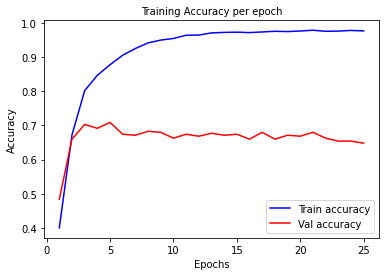

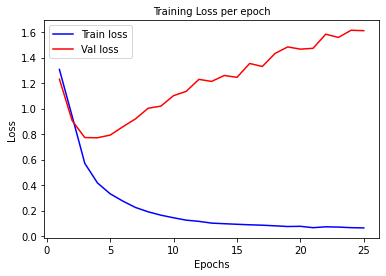

In [153]:
# Answer here

# Plot the training and validation accuracy
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Training Accuracy per epoch', fontsize=10)
x = np.arange(1, len(training_log.accuracy)+1, 1)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(x, training_log.accuracy, color='b', label='Train accuracy',linewidth=1.5)
plt.plot(x, training_log.val_accuracy,  color='r', label='Val accuracy', linewidth=1.5)
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.legend()
plt.show()

# Plot the training and validation loss
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Training Loss per epoch', fontsize=10)
x = np.arange(1, len(training_log.loss)+1, 1)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(x, training_log.loss, color='b', label='Train loss',linewidth=1.5)
plt.plot(x, training_log.val_loss,  color='r', label='Val loss', linewidth=1.5)
plt.ylabel('Loss', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.legend()
plt.show()

Interpretation:<br><br>
The above results show that as the training accuracy increase, the validation accuracy doesn't increase as well after the fifth epoch. Although our model can achieve 97.6% training accuracy, the validation accuracy is only about 64.8%. From the point of view of accuracy, we have doubt about the performance of model.<br><br>
On the other hand, we can clearly see the problem of overfitting from the loss plot. The loss plot shows that the training loss is decreasing but the validation loss increasing, which cause the gap between training and validation loss become larger. The large gap also means poor generalization performance of our predictive model, and this is the problem of overfitting.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [161]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3445,40618,Do not grow weary in doing good.'\n\n-@billcli...,"[Do, not, grow, weary, in, doing, good, ., '\n..."
664,10664,“He who is slow to anger is better than the mi...,"[“, He, who, is, slow, to, anger, is, better, ..."
541,10541,I get embarrassed at the slightest things and ...,"[I, get, embarrassed, at, the, slightest, thin..."
369,10369,I need some to help with my anger,"[I, need, some, to, help, with, my, anger]"
2542,30538,i started glee from the beginning n i'm crying...,"[i, started, glee, from, the, beginning, n, i,..."


In [155]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Do', 'not', 'grow', 'weary', 'in', 'doing', 'good', '.', "'\\n\\n-", '@', 'billclinton']),
       list(['“', 'He', 'who', 'is', 'slow', 'to', 'anger', 'is', 'better', 'than', 'the', 'mighty', ',', 'And', 'he', 'who', 'rules', 'his', 'spirit', 'than', 'he', 'who', 'takes', 'a', 'city.', '”', '\\nP16:32', '#', 'bibleverse', '#', 'pride', '#', 'anger']),
       list(['I', 'get', 'embarrassed', 'at', 'the', 'slightest', 'things', 'and', 'then', 'I', "'ll", 'fret', 'about', 'it', 'all', 'day', 'I', 'hate', 'it'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [156]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3445,40618,Do not grow weary in doing good.'\n\n-@billcli...,"[Do, not, grow, weary, in, doing, good, ., '\n..."
664,10664,“He who is slow to anger is better than the mi...,"[“, He, who, is, slow, to, anger, is, better, ..."
541,10541,I get embarrassed at the slightest things and ...,"[I, get, embarrassed, at, the, slightest, thin..."
369,10369,I need some to help with my anger,"[I, need, some, to, help, with, my, anger]"
2542,30538,i started glee from the beginning n i'm crying...,"[i, started, glee, from, the, beginning, n, i,..."


In [157]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [158]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.41967902, -0.09593724, -0.18268237,  0.2027805 , -0.59195405,
       -0.8616839 ,  0.73653984,  1.0110562 , -0.37342918, -0.34173378,
       -0.19260222, -0.07393138, -0.80549157, -0.18676585, -0.02824136,
       -0.6589529 ,  0.38582048, -0.8982694 ,  0.07656817, -1.6198158 ,
        0.9085293 ,  0.78345054,  0.487014  , -0.15692034,  0.17961657,
       -0.00864019, -0.60891885,  0.1502875 , -0.12724094,  0.25525567,
        0.18688142,  0.20482709,  0.19859193, -0.68083996,  0.17485683,
        0.5979865 ,  0.17758891, -0.49292716, -0.5622356 , -0.6726124 ,
       -0.08249402, -0.26515147, -0.35555762,  0.32782042,  0.904403  ,
       -0.4939974 , -0.79870445,  0.07064229,  0.85683024,  0.12079865,
       -0.05576222, -0.60777867,  0.0140447 , -0.11256596, -0.350292  ,
       -0.05656521, -0.09162888, -0.18439262, -0.33776563,  0.08260567,
        0.06248866, -0.13704015,  0.5696714 ,  0.09811783, -0.5742682 ,
        1.0212424 , -0.02858891,  0.37040302, -1.5102782 ,  0.70

In [159]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9339891076087952),
 ('bday', 0.9246553182601929),
 ('blessed', 0.9182061553001404),
 ('ability', 0.9172132015228271),
 ('smile', 0.9152601957321167),
 ('help', 0.9131129384040833),
 ('free', 0.90907883644104),
 ('birthday', 0.9086689949035645),
 ('cats', 0.906075119972229),
 ('cry', 0.9034874439239502)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [160]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [162]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [163]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [54]:
# Answer Below

Word2Vec is to represent a word into vector. After the training process, we can get the relationship between each word based on the word vectors. Howeverm, we will meet some challenges when we try to use these word vectors generated by Word2Vec to represent the sentence data.<br><br>
First of all, from the dataset we know that the length of each sentence is different. If we combine several word vectors into a single matrix, the matrix will be sparse for the sentences which have shorter setence length. A sparse matrix can increase both the computational and memory resources, which is not a appropriate. To deal with this problem, there are differet methods to help us to get the sentence vectors.

1. Doc2Vec : Train the dataset using Doc2Vec and then use the sentence vectors.
2. Average of Word2Vec vectors : Take the average of all the word vectors in a sentence. This average vector will represent the sentence vector.

After doing these sentence embedding process, we can use these vectors as the model input to train our model.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [164]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [165]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [166]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [167]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happpy words
- angry words
- data words
- mining words

In [168]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

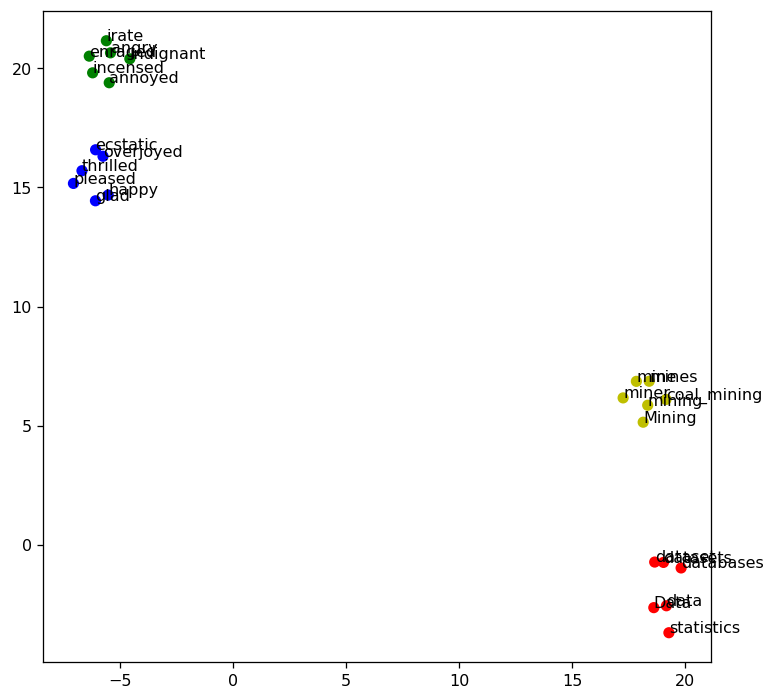

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
# all_word = list(model.vocab.keys()) ## Old Gensim version can't be used
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

Prepare data lists like:
- happpy words
- angry words
- data words
- mining words

In [171]:
# Answer here
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('\nangry_words: ', angry_words)
print('\ndata_words: ', data_words)
print('\nmining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']

data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']

mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'deligh

Plot using t-SNE (2-dim)

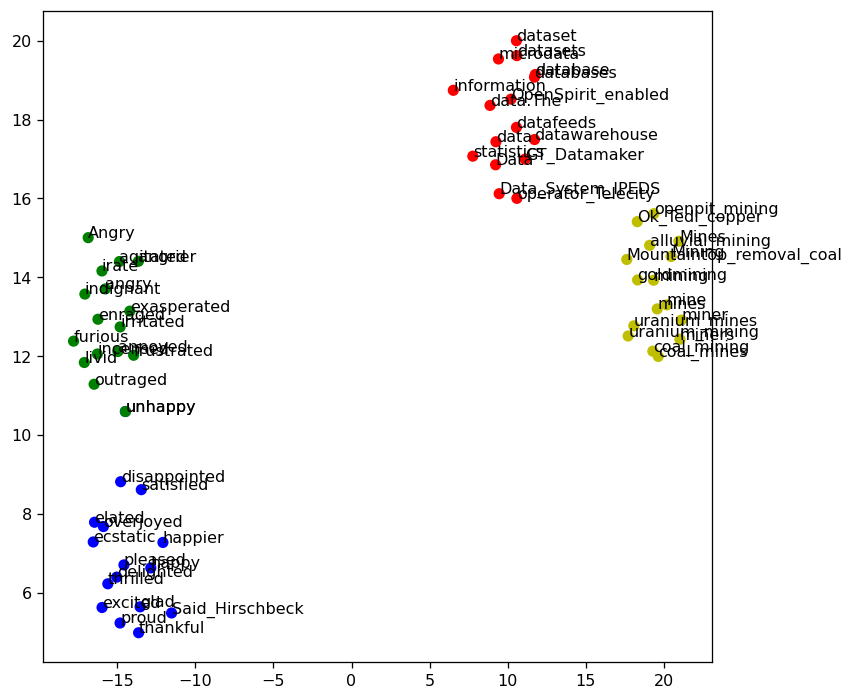

In [172]:
## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---